# A Yen for the Future 

## *A Time-Series Analysis Project*

In [2]:
# Import the requirements - ignore the warnings 
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Return Forecasting - Time Series Analysis & Modelling with CAD-JPY Exchange Rate Data 

##### In this notebook I will run an analysis to determine if there is any predictable behaviour within the CAD-JPY historical exchange rate 

In [3]:
# Load in the data for the historical exchange rate between CAD & JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

#View the data
cad_jpy_df.head(10)

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64
1982-01-12,187.20,187.20,187.20,187.20
1982-01-13,188.35,188.35,188.35,188.35
1982-01-14,187.96,187.96,187.96,187.96
1982-01-15,187.88,187.88,187.88,187.88


In [4]:
# Clean the dataset to start on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]

# View the data
cad_jpy_df.head(10)

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21
1990-01-09,125.10,125.04,125.10,125.04
1990-01-10,125.81,125.75,125.81,125.75
1990-01-11,125.85,125.80,125.85,125.80
1990-01-12,126.00,125.94,126.00,125.94


## Initial Time-Series Graphing

##### I will start b y plotting the "Settle" price & look for any patterns over the long and short term

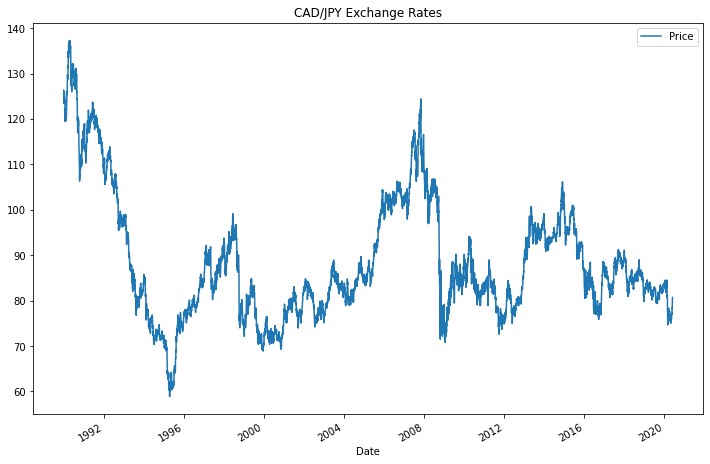

In [5]:
# Graph the "Price" column from the data
title = 'CAD/JPY Exchange Rates'
cad_jpy_df['Price'].plot(figsize = (12,8), title = title, legend = True)

# Display the graph
plt.show()

##### Are there any patterns in the short or long term that can be observed?

##### Overall, from the beginning of the data (1990) to the end (2020) we can observe an overall downtrend, meaning that the exchange rate between CAD & JPY has decreased. Throughout the years the exchange rate has been relatively volitile, decreasing rapidly from ~1992 to ~1996, increasing unevenly until ~2008, then decreasing in waves until 2020

### Decomposition Using a Hodrick-Prescott Filter

##### Here I will use a Hodrick-Prescott Filter to decompose the exchange rate price into trend and noise

In [6]:
# Import the required library to run HPF
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
noise, trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price'])

<AxesSubplot:xlabel='Date'>

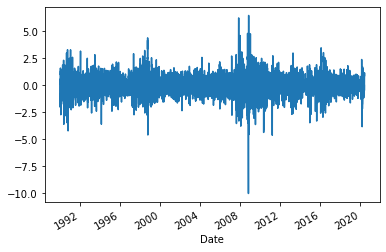

In [7]:
# Show the graphs displaying the noise
noise.plot()

<AxesSubplot:xlabel='Date'>

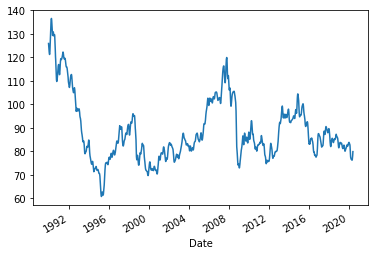

In [8]:
# Show the graphs displaying the trend
trend.plot()

##### Can any patterns be observed in the short or long terms?

##### In general, we can observe that the noise increases around the same time the exchange hits either an upper or lower peak. We can see this occur around the years 2000 and 2008 demonstrated especially well.

### Forcasting returns using an ARMA Model

##### Using exchnage rate *returns*, estimate an ARMA Model

###### Criteria for the ARMA Model:

###### - ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1)

In [9]:
# Import the required library for the ARMA Model
from statsmodels.tsa.arima.model import ARIMA

# Import warnings to neglect warnings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [10]:
# Create a series using "Price" percentage returns
returns = (cad_jpy_df[["Price"]].pct_change() * 100)

# Drop any null values from this dataframe
returns = returns.replace(-np.inf, np.nan).dropna()

# Rename the price column 
returns = returns.rename(columns={'Price': 'Returns'})

# View the data
returns.tail(10)

,Returns
Date,
2020-05-22,-0.311203
2020-05-25,0.169095
2020-05-26,1.350474
2020-05-27,0.345932
2020-05-28,-0.114913
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134


In [11]:
# Create an ARMA model using statsmodels [order=(2, 1)]
model = ARIMA(returns.values, order=(2,0,1))

# Fit the model and assign it to a variable called results
results = model.fit()

# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -9752.310
Date:                Wed, 20 Jul 2022   AIC                          19514.620
Time:                        23:11:05   BIC                          19549.511
Sample:                             0   HQIC                         19526.568
                               - 7928                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.237      0.813      -0.021       0.016
ar.L1         -0.0152      3.499     -0.004      0.997      -6.873       6.843
ar.L2         -0.0018      0.107     -0.017      0.987      -0.212       0.209
ma.L1         -0.0153      3.499     -0.004      0.997      -6.874       6.844
sigma2         0.6855      0.006    122.678      0.000       0.675       0.696
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11578.41
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

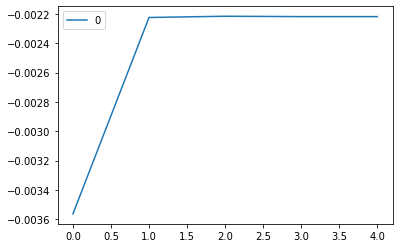

In [12]:
# Plot a forecast of the next five days returns 
fiveday_fc = results.forecast(5, alpha=0.05, )
pd.DataFrame(fiveday_fc).plot()

##### Based on the p-value, is the model a good fit?

##### Due to the fact that the p-value is very large, we can conclude that the model is not a good fit.

### Forecasting the Exchange Rate Price Using an ARIMA Model

##### Use the raw CAD-JPY exchange rate prices to estimate an ARIMA model

###### Criteria of the ARIMA Model:

###### - Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))

###### - P is # of Auto-Regressive Lags, D is # of Differences (this is usually =1), Q is # of Moving Average Lags

In [13]:
# Import the library needed for the ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [14]:
# Estimate an ARIMA Model:
arima = ARIMA(returns.values, order=(5,1,1))

In [15]:
# Fit the model
results_arima = arima.fit()

In [16]:
# Output the model summary results:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9754.288
Date:                Wed, 20 Jul 2022   AIC                          19522.575
Time:                        23:11:11   BIC                          19571.422
Sample:                             0   HQIC                         19539.302
                               - 7928                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0303      0.007     -4.364      0.000      -0.044      -0.017
ar.L2         -0.0025      0.007     -0.373      0.709      -0.016       0.011
ar.L3         -0.0101      0.008     -1.270      0.204      -0.026       0.005
ar.L4          0.0016      0.007      0.225      0.822      -0.012       0.015
ar.L5         -0.0187      0.007     -2.709      0.007      -0.032      -0.005
ma.L1         -1.0000      0.010    -98.701      0.000      -1.020      -0.980
sigma2         0.6853      0.010     71.710      0.000       0.667       0.704
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11614.21
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

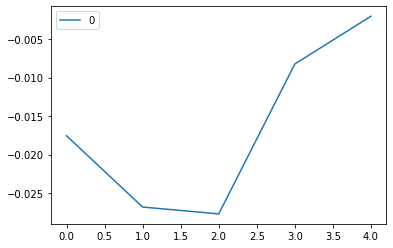

In [17]:
# Plot the 5 Day Returns Forecast
fivedayARIMA_fc = results_arima.forecast(5, alpha=0.05, )
pd.DataFrame(fivedayARIMA_fc).plot()

##### What does the model forecast will happen to the Japanese Yen in the near term?

##### In the near future the model is predicting that the Japanese Yen will increase in relative value, reaching close to a 1:1 exchange rate with the Canadian Dollar.

### Volitility Forecasting with ARCH

In [19]:
# Import the required libraries
import arch as arch
from arch import arch_model

In [20]:
# Estimate a GARCH model:
model_garch = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

In [21]:
# Fit the model
res = model_garch.fit(disp="off")

In [22]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Wed, Jul 20 2022   Df Residuals:                     7928
Time:                        23:12:12   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [23]:
# What is the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [24]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

In [25]:
# Start the forecast using the last_day calculated above
forecasts = res.forecast(start=last_day, horizon=forecast_horizon)

In [26]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [29]:
# Transpose the forecast to make it easier to plot
final_arch = intermediate.dropna().T
final_arch.head(10)

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


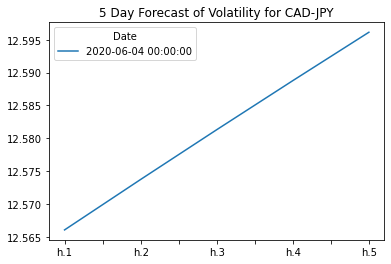

In [31]:
# Plot the final forecast
final_arch.plot(title = '5 Day Forecast of Volatility for CAD-JPY')
plt.show()

##### What does the model forecast will happen to volitility in the near future?

##### The model's results predict that volitility will be increasing in the near future.

### Conculsions from the CAD-JPY Time-Series Analysis

##### Based on the analysis, would you buy Yen now?

##### After the analysis I have ran, I would determine that now is not agod time to buy Yen. This is because the overall trend of the exchange shows that the relative value of Yen is decreasing. As well, the overall volitility ofthe exchange is predicted to continue increasing.

<br>

##### Is the risk of Yen excpected to increase of decrease?

##### The analysis has shown that the risk of Yen is expected to increase.

<br>

##### Based on the model evaluation, would you feel confident in using these models for trading?

##### I would consider usinhg the results of the ARCH model in my decisions regarding this exchange. However I would not use it as a sole indicator but rather as a supplementary indicator. In regard to the ARMA and ARIMA models, I would not feel confident in using either of these models are a research tool based on there current parameters.